# 一般化線形モデル (GLM) 1

## 一般化線形モデル (GLM) って何なの?

__一般線形モデル__ = 
-  ばらつきをあらわす確率分布が正規分布
-  確率分布の平均 = 線形予測子
-  確率分布の分散は一定．

（anovaとか重回帰とかそんなの，これで統一的に扱える．しかしあまり言わない．なぜならもっと一般的な枠組みがあるから．）

>この講義では，「データを図にして，ばらつきをよく見て，統計モデルの部品である確率分布を選んで......」といった統計モデリングのお作法をおススめしております.ということで，それが実現できそうな統計モデリングとして，とりあえずてはじめに一般化線形モデルから始めましょう，とい うのが今日のハナシです.

__一般化線形モデル (generalized linear model; GLM)__ = 
- 確率分布は正規分布だけでなく，ポアソン分布・二項分布・ガンマ分布などが選択できる
- 確率分布の平均は線形予測子だけでなくlink 関数にも依存する
- 確率分布の分散は使っている確率分布にあわせて変化しうる(例: ポアソン分布なら分散は平均とともに増大)

>(線形の) ポアソン回帰や logistic 回帰や正規分布の統計モデルをタバねたものを「一般化線形モデル」と呼んでいる，という理解でもよいかと思います.

## GLM の部品: 確率分布，link 関数，線形予測子

__線形予測子__

最小二乗法でパラメーターを推定するには，平均$\mu$は，説明変数の線形和である必要がある．
\begin{align}
  \mu := \sum \beta_j \cdot x_j.
\end{align}.

より一般に，
\begin{align}
  z := \sum \beta_j \cdot x_j.
\end{align}
とすると，$z$は__線形予測子__と呼ばれる．GLMとは（ざっくり言って）モデル内のどこかにこの線形予測子をもつ統計モデルのこと（確率分布やlink関数を好きなように選べない制約はある）．

一般化線形モデルでは，$z = \mu$以外も扱える．例えば$z = \log\mu$としてもよく，この時
\begin{align}
  \mu := \exp(\sum \beta_j \cdot x_j).
\end{align}
で，この統計モデルのパラメータも推定できる．

## GLM の例題: 架空植物のデータ解析

個体ごとの種子数がどのように決まるか．
- $i$ : 個体 ($1 \leq i \leq 100$ )
- $y_i$ : 種子数
- $x_i$ : サイズ
- C個体 : 何もしてない($1 \leq i \leq 50$ )
- T個体 : 肥料あり($51 \leq i \leq 100$ )



In [2]:
d <- read.csv("data3a.csv")

In [3]:
d

y,x,f
6,8.31,C
6,9.44,C
6,9.50,C
12,9.07,C
10,10.16,C
4,8.32,C
9,10.61,C
9,10.06,C
9,9.93,C
11,10.43,C


In [4]:
d$x

[1]  8.31  9.44  9.50  9.07 10.16  8.32 10.61 10.06  9.93 10.43 10.36 10.15
 [13] 10.92  8.85  9.42 11.11  8.02 11.93  8.55  7.19  9.83 10.79  8.89 10.09
 [25] 11.63 10.21  9.45 10.44  9.44 10.48  9.43 10.32 10.33  8.50  9.41  8.96
 [37]  9.67 10.26 10.36 11.80 10.94 10.25  8.74 10.46  9.37  9.74  8.95  8.74
 [49] 11.32  9.25 10.14  9.05  9.89  8.76 12.04  9.91  9.84 11.87 10.16  9.34
 [61] 10.17 10.99  9.19 10.67 10.96 10.55  9.69 10.91  9.60 12.37 10.54 11.30
 [73] 12.40 10.18  9.53 10.24 11.76  9.52 10.40  9.96 10.30 11.54  9.42 11.28
 [85]  9.73 10.78 10.21 10.51 10.73  8.85 11.20  9.86 11.54 10.03 11.88  9.15
 [97]  8.52 10.24 10.86  9.97

In [6]:
d$y

[1]  6  6  6 12 10  4  9  9  9 11  6 10  6 10 11  8  3  8  5  5  4 11  5 10  6
 [26]  6  7  9  3 10  2  9 10  5 11 10  4  8  9 12  8  9  8  6  6 10 10  9 12  6
 [51] 14  6  7  9  6  7  9 13  9 13  7  8 10  7 12  6 15  3  4  6 10  8  8  7  5
 [76]  6  8  9  9  6  7 10  6 11 11 11  5  6  4  5  6  5  8  5  9  8  6  8  7  9

In [7]:
d$f

[1] C C C C C C C C C C C C C C C C C C C C C C C C C C C C C C C C C C C C C
 [38] C C C C C C C C C C C C C T T T T T T T T T T T T T T T T T T T T T T T T
 [75] T T T T T T T T T T T T T T T T T T T T T T T T T T
Levels: C T

In [8]:
print(class(d))
print(class(d$y))
print(class(d$x))
print(class(d$f))

[1] "data.frame"
[1] "integer"
[1] "numeric"
[1] "factor"


In [9]:
summary(d)

       y               x          f     
 Min.   : 2.00   Min.   : 7.190   C:50  
 1st Qu.: 6.00   1st Qu.: 9.428   T:50  
 Median : 8.00   Median :10.155         
 Mean   : 7.83   Mean   :10.089         
 3rd Qu.:10.00   3rd Qu.:10.685         
 Max.   :15.00   Max.   :12.400         

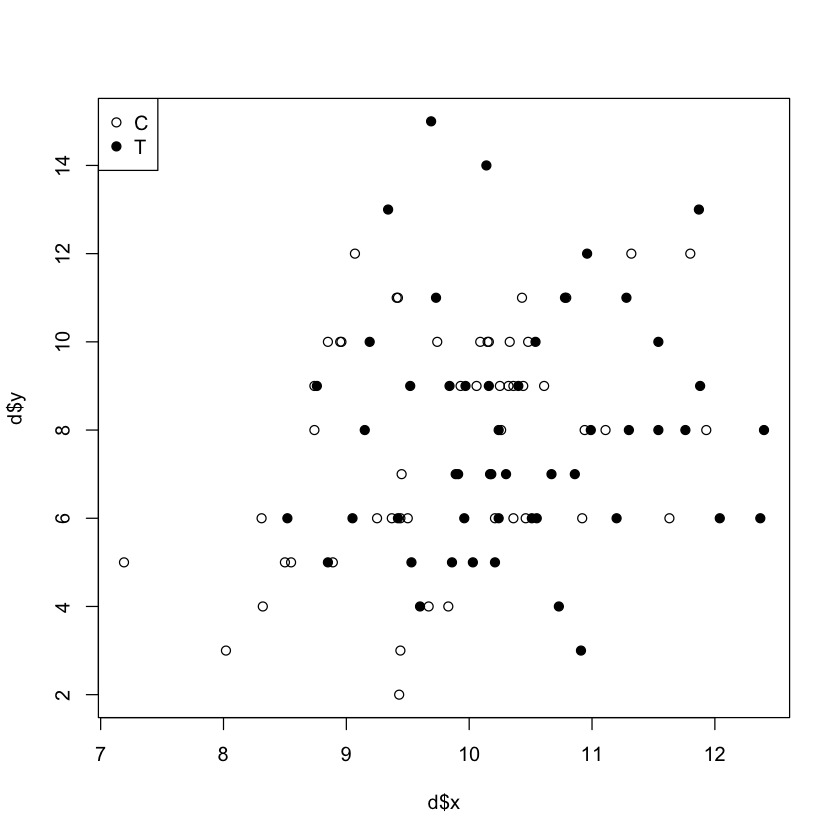

In [15]:
plot(d$x, d$y, pch = c(21, 19)[d$f])
legend("topleft", legend = c("C", "T"), pch = c(21, 19))

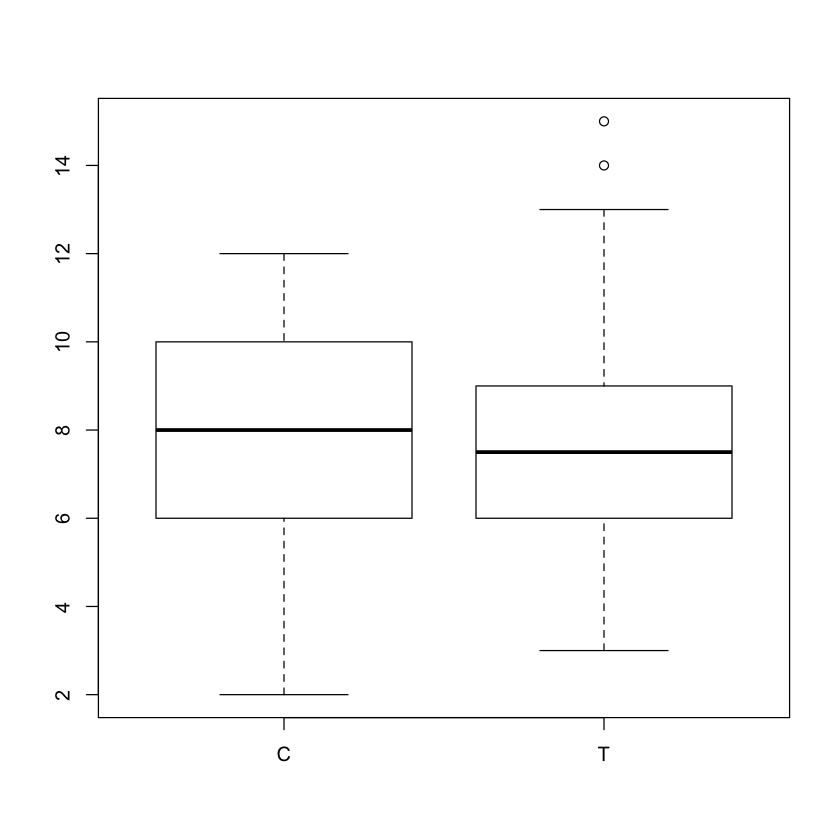

In [16]:
plot(d$f, d$y)

## 統計モデリング: glm(..., family = poisson)


>ここでやりたいことは d の y 列にある個体ごとの種子数がサイズ x や施肥処理 f にどう影響されているのか (あるいは されていないのか)，種子数のばらつきも含めて統計モデルのひとつである 一般化線形モデルとして表現したい，ということです.

個体iの種子数yi は
- 0 個, 1 個, 2 個と数えられるカウントデータ
- 値に上限があるのか (このデータからは) はっきりしない

$\Rightarrow$ ポアソン分布を仮定．

$\Rightarrow$　ある個体$i$の種子数の平均$\lambda_i$
\begin{align}
    \lambda_i = \exp(\beta_1  + \beta_2 x_i)
\end{align}
と仮定．($f_i$は関係なさそうなで一旦無視．)

\begin{align}
    \log\lambda_i = \beta_1  + \beta_2 x_i
\end{align}
だから線形予測子は$z = \beta_1  + \beta_2 x_i$となっている．
loglink関数は$\lambda_i \geq 0$とも合うし便利．

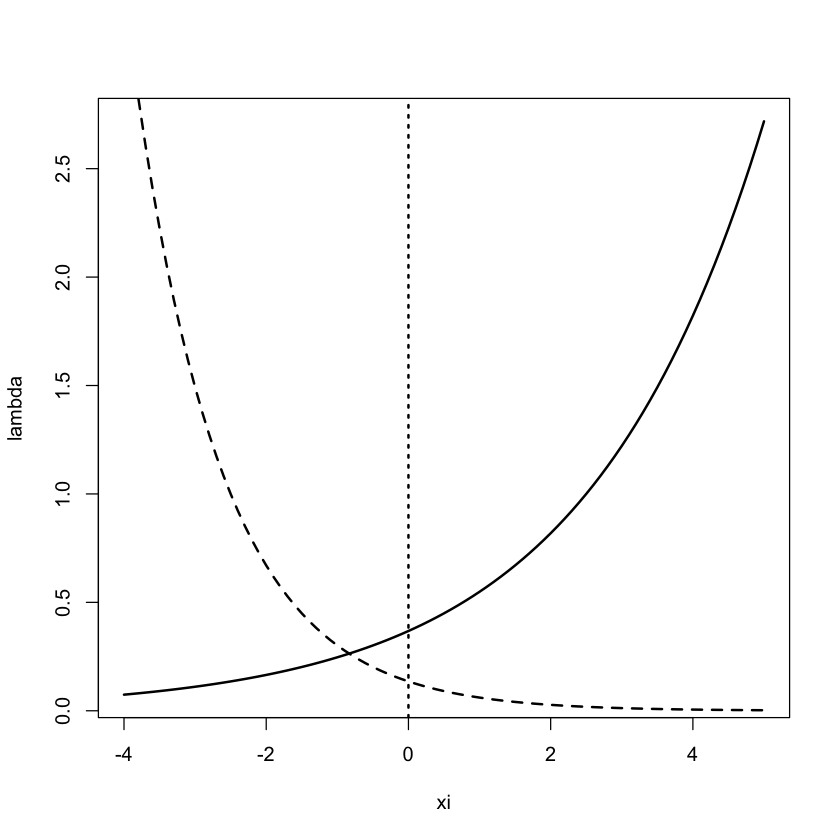

In [17]:
xi <- seq(-4, 5, 0.1)
plot(xi, exp(-1 + 0.4 * xi), type = "l", ylab = "lambda", lwd = 2)
lines(xi, exp(-2 - 0.8 * xi), lwd = 2, lty = 2)
abline(v = 0, lwd = 2, lty = 3)

最尤法でパラメータを求める．

In [19]:
fit <- glm(y~x, data = d, family = poisson) #link関数は標準でlog

In [20]:
fit


Call:  glm(formula = y ~ x, family = poisson, data = d)

Coefficients:
(Intercept)            x  
    1.29172      0.07566  

Degrees of Freedom: 99 Total (i.e. Null);  98 Residual
Null Deviance:	    89.51 
Residual Deviance: 84.99 	AIC: 474.8

In [22]:
summary(fit)


Call:
glm(formula = y ~ x, family = poisson, data = d)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.3679  -0.7348  -0.1775   0.6987   2.3760  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept)  1.29172    0.36369   3.552 0.000383 ***
x            0.07566    0.03560   2.125 0.033580 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for poisson family taken to be 1)

    Null deviance: 89.507  on 99  degrees of freedom
Residual deviance: 84.993  on 98  degrees of freedom
AIC: 474.77

Number of Fisher Scoring iterations: 4


標準誤差の推定は色々問題があるらしい．
ここはちゃんと別の読まないとダメ．というかあまり読まなくてもいい？

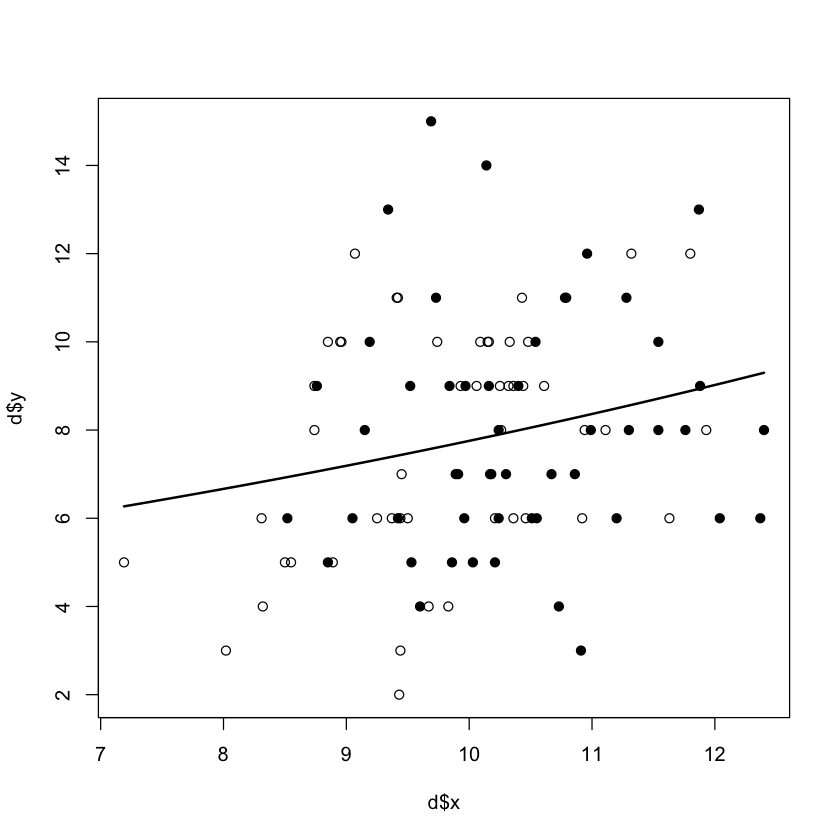

In [25]:
plot(d$x, d$y, pch = c(21, 19)[d$f])
xx <- seq(min(d$x), max(d$x), length = 100)
yy <- predict(fit, newdata = data.frame(x = xx), type = "response")
lines(xx, yy, lwd = 2)

In [34]:
logLik(fit) #最大化された対数尤度

'log Lik.' -235.3863 (df=2)

## 因子型の説明変数の場合

In [27]:
fit.f <- glm(y ~ f, data = d, family = poisson)
fit.f


Call:  glm(formula = y ~ f, family = poisson, data = d)

Coefficients:
(Intercept)           fT  
    2.05156      0.01277  

Degrees of Freedom: 99 Total (i.e. Null);  98 Residual
Null Deviance:	    89.51 
Residual Deviance: 89.48 	AIC: 479.3

In [28]:
summary(fit.f)


Call:
glm(formula = y ~ f, family = poisson, data = d)

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-2.47515  -0.69941   0.04264   0.72467   2.25204  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept)  2.05156    0.05070  40.463   <2e-16 ***
fT           0.01277    0.07148   0.179    0.858    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for poisson family taken to be 1)

    Null deviance: 89.507  on 99  degrees of freedom
Residual deviance: 89.475  on 98  degrees of freedom
AIC: 479.25

Number of Fisher Scoring iterations: 4


fTはCを基準にそのずれを見るということ．
個体iのfがCなら
\begin{align}
    \lambda_i \approx \exp(2.05 + 0)
\end{align}
Tなら
\begin{align}
    \lambda_i \approx \exp(2.05 + 0.1277)
\end{align}
肥料をやると少しだけ効果あり．

In [29]:
 logLik(fit.f)

'log Lik.' -237.6273 (df=2)

## 説明変数が数量型 + 因子型のモデル

In [30]:
fit.full <- glm(y ~ x + f, data = d, family = poisson)
fit.full


Call:  glm(formula = y ~ x + f, family = poisson, data = d)

Coefficients:
(Intercept)            x           fT  
    1.26311      0.08007     -0.03200  

Degrees of Freedom: 99 Total (i.e. Null);  97 Residual
Null Deviance:	    89.51 
Residual Deviance: 84.81 	AIC: 476.6

fTはマイナス評価

$\exp(1.26 + 0.08x_i - 0.032) = \exp(1.26+0.08x_i) \times \exp(-0.032)$

In [32]:
logLik(fit.full)

'log Lik.' -235.2937 (df=3)

## Deviance って何なの?

色々なモデルを作ったけど，どれがいいの？fTはプラスだったりマイナスだったり．

当てはまりの良さを考えよう．それは__最大化された対数尤度__が表している．
モデルの最大化された対数尤度$\log L^*$とするとdeviance$D$は
\begin{align}
 D = -2\log L^*
\end{align}
で定義される．

__Residence deviance__ : $D- (ポアソン分布で可能な最小D)$

(ポアソン分布で可能な最小D)はfull modelのD．100個のデータなら100個のパラメータを使って当てはめたモデル．この時対数尤度は最大化される．
つまり，すごくよく当てはまる時$D= 0$

もっともパラメータの少ないモデルを__null model__という．

In [35]:
fit.null <- glm(formula = y ~ 1, family = poisson, data = d)
fit.null


Call:  glm(formula = y ~ 1, family = poisson, data = d)

Coefficients:
(Intercept)  
      2.058  

Degrees of Freedom: 99 Total (i.e. Null);  99 Residual
Null Deviance:	    89.51 
Residual Deviance: 89.51 	AIC: 477.3

In [36]:
logLik(fit.null)

'log Lik.' -237.6432 (df=1)

null modelのDとの比較で改善を判断する．

|Model|k|$\log L^*$|Deviance|Residual deviance|
|-----|-|-------|--------|-----------------|
|Null |1|-237.6 |475.3   |89.5             |
|f    |2|-237.6 |475.3   |89.5             |
|x    |2|-235.4 |470.8   |85.0             |
|x+f  |3|-253.3 |470.6   |84.8             |
|Full |100|-192.9|385.8  |0.0              |

パラメータ増やせばよくなってきている．

## 「よい」モデルを選ぶモデル選択

対数尤度の最大化だけを求めてもダメなのが上でわかった．

>統計モデリングでは

>  ・できるだけ最大化対数尤度が大きいあてはまりのよいモデル

>  ・できるだけパラメーター数が少ない簡単なモデル

> という矛盾したふたつの要求をバランスよく満たすような統計モデルを見つけること
> を モデル選択 (model selection) とよび，このときにモデルのよし あしを決める
> のがモデル選択規準です

よく使われる基準は__AIC__

    ACI = -2(最大化対数尤度)　+ 2(そのモデルで使ってるパラメータ数)
    　　= -2Log L* + 2k
      
これが小さいものを選ぶ．

In [38]:
 library(MASS)
stepAIC(fit.full)

Start:  AIC=476.59
y ~ x + f

       Df Deviance    AIC
- f     1   84.993 474.77
<none>      84.808 476.59
- x     1   89.475 479.25

Step:  AIC=474.77
y ~ x

       Df Deviance    AIC
<none>      84.993 474.77
- x     1   89.507 477.29



Call:  glm(formula = y ~ x, family = poisson, data = d)

Coefficients:
(Intercept)            x  
    1.29172      0.07566  

Degrees of Freedom: 99 Total (i.e. Null);  98 Residual
Null Deviance:	    89.51 
Residual Deviance: 84.99 	AIC: 474.8

## 今日のまとめ

- 一般化線形モデル (GLM) はポアソン回帰・ロジスティック回帰・正規 分布を仮定する直線回帰や (いわゆる) ANOVA を統合した呼びかた である
- R では glm() 関数でまとめてあつかえる
- GLM の基本部品: 確率分布・link 関数・線形予測子
- ポアソン回帰は確率分布 = ポアソン分布 (poisson)，link 関数 = log
- glm() 関数は GLM のパラメーターを最尤推定する
- 推定結果を使って予測 (prediction) ができる
- Deviance は -2 × 最大化対数尤度，あてはまりの悪さ
- AIC = Deviance + 2 × (パラメーター数)，あてはまりの良さとパラ メーター数の「バランス」をとる